In [ ]:
import numpy as np
import math

Re = 100
N = 128
dt = 0.002
Lx = 1
Ly = 1
dx = Lx/N
dy = Ly/N
x = np.arange(0, 1 + 1/(N+1), 1/(N+1))
print(x)
print(x.shape)
y = np.arange(0, 1 + 1/(N+1), 1/(N+1))
print(y)
print(y.shape)


[0.         0.00775194 0.01550388 0.02325581 0.03100775 0.03875969
 0.04651163 0.05426357 0.0620155  0.06976744 0.07751938 0.08527132
 0.09302326 0.10077519 0.10852713 0.11627907 0.12403101 0.13178295
 0.13953488 0.14728682 0.15503876 0.1627907  0.17054264 0.17829457
 0.18604651 0.19379845 0.20155039 0.20930233 0.21705426 0.2248062
 0.23255814 0.24031008 0.24806202 0.25581395 0.26356589 0.27131783
 0.27906977 0.28682171 0.29457364 0.30232558 0.31007752 0.31782946
 0.3255814  0.33333333 0.34108527 0.34883721 0.35658915 0.36434109
 0.37209302 0.37984496 0.3875969  0.39534884 0.40310078 0.41085271
 0.41860465 0.42635659 0.43410853 0.44186047 0.4496124  0.45736434
 0.46511628 0.47286822 0.48062016 0.48837209 0.49612403 0.50387597
 0.51162791 0.51937984 0.52713178 0.53488372 0.54263566 0.5503876
 0.55813953 0.56589147 0.57364341 0.58139535 0.58914729 0.59689922
 0.60465116 0.6124031  0.62015504 0.62790698 0.63565891 0.64341085
 0.65116279 0.65891473 0.66666667 0.6744186  0.68217054 0.689922

In [ ]:
psi = np.zeros((N+2, N+2))
print(psi)
print(psi.shape)
omega = np.zeros((N+2, N+2))
print(omega)
print(omega.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(130, 130)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(130, 130)


In [ ]:
max_time = 1
nt = int(max_time//dt)
print(nt)

for i in range(1,5):
  print(i)

99
1
2
3
4


In [ ]:
for k in range(nt):
  # Gauss Seidel
  dy = 1/(N)
  error = float('inf')
  n = 0

  #boundry condition on psi
  for i in range(N+2):
    psi[0, i] = psi[1, i]
    psi[N+1, i] = psi[N, i]
    psi[i, 0] = psi[i, 1]
    psi[i, N+1] = psi[i, N] + dy

  while error > 1e-3:
    error = 0
    n += 1
    for j in range(1, N+1):
     for i in range(1, N+1):
        psi_n = psi[i][j]
        psi[i][j] = (psi[i+1][j] + psi[i-1][j] + psi[i][j+1] + psi[i][j-1] + omega[i][j]*dy*dy) / 4.0
        psi_n_1 = psi[i][j]
        error += abs(psi_n - psi_n_1)
    print(error)
  #print(n)



  #Boundry codition on omega
  for i in range(N+2):
    omega[0, i] = (-16/(dx*dx))*psi[1, i] - omega[1, i]    # left wall
    omega[N+1, i] = (-16/(dx*dx))*psi[N, i] - omega[N, i]    # right wall

    omega[i, 0] = (-16/(dy*dy))*psi[i, 1] - omega[i, 1]    # bottom wall
    omega[i, N+1] = (-16/(dy*dy))*psi[j, N] - omega[i, N] - 8.0/dy    # top wall
  omega_n = omega.copy()
  #calculate omega
  for j in range(1, N+1):
    for i in range(1, N+1):
      omega[i][j] = ((omega_n[i+1][j]-2*omega_n[i][j]+omega_n[i-1][j])/(dx*dx) + (omega_n[i][j+1]-2*omega_n[i][j]+omega_n[i][j-1])/(dy*dy))*(dt/Re) \
      + (omega_n[i][j+1]-omega_n[i][j-1])*(psi[i+1][j]-psi[i-1][j])*(dt/(4*dx*dy)) - (omega_n[i+1][j]-omega_n[i-1][j])*(psi[i][j+1]-psi[i][j-1])*(dt/(4*dx*dy)) + omega_n[i][j]










Streaming output truncated to the last 5000 lines.
1519672.8653632132
1517402.517979214
1515135.6760892307
1512872.3177002508
1510612.4304779293
1508356.0087534322
1506103.046867235
1503853.5391727283
1501607.4800303667
1499364.8653709893
1497125.6984476582
1494889.9632308248
1492657.6541249075
1490428.7655440439
1488203.294432801
1485981.2596090727
1483762.6285596509
1481547.3958911635
1479335.5563908825
1477127.1040669149
1474922.0334055868
1472720.338903763
1470522.0150696693
1468327.0564191036
1466135.457480658
1463947.2127899437
1461762.317240466
1459580.7939570334
1457402.6085371904
1455227.7555596156
1453056.2296107595
1450888.0252898512
1448723.137203837
1446561.5599706084
1444403.2882181806
1442248.3165832388
1440096.6397141835
1437948.2522673837
1435803.163829702
1433661.3706571676
1431522.8614092197
1429387.6202521548
1427255.6418933924
1425126.9210476142
1423001.452441005
1420879.2308088455
1418760.2516726316
1416644.509085675
1414531.9977410238
1412422.7284158042
1410316.6

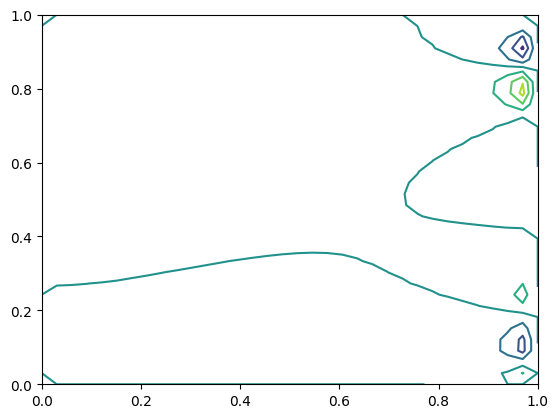

In [ ]:
import matplotlib.pyplot as plt
[X, Y] = np.meshgrid(x, y)

plt.contour(X, Y, psi)


plt.show()